In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm


In [41]:
plt.rcParams['figure.figsize'] = [20, 15]

In [42]:
df = pd.read_csv("hourly_mean.csv")
nans = dict(df.isna().sum())
keys = list(nans.keys())
for key in keys:
    if nans[key] != 0:
        tmp = df[key].dropna()
        mean = tmp.mean()
        df[key] = df[key].fillna(mean)


In [43]:
df.columns
df

,Date_Time,Temperature_in,Temperature_out,Power
0,2020/01/01 00:00:00,16.836323,4.648148,6.980259e+06
1,2020/01/01 01:00:00,16.811236,3.944444,7.168477e+06
2,2020/01/01 02:00:00,16.791497,3.839506,7.601482e+06
3,2020/01/01 03:00:00,16.773231,3.359147,7.979168e+06
4,2020/01/01 04:00:00,16.760858,3.490741,8.279105e+06
...,...,...,...,...
8755,2020/12/31 19:00:00,16.831276,3.440551,1.130927e+07
8756,2020/12/31 20:00:00,16.739482,3.244213,1.214223e+07
8757,2020/12/31 21:00:00,16.660502,2.905093,1.287894e+07
8758,2020/12/31 22:00:00,16.593613,3.121528,1.356356e+07


In [45]:
df['deltaT']=df.Temperature_in-df.Temperature_out
df = df.set_index('Date_Time')
df

,Temperature_in,Temperature_out,Power,deltaT
Date_Time,,,,
2020/01/01 00:00:00,16.836323,4.648148,6.980259e+06,12.188175
2020/01/01 01:00:00,16.811236,3.944444,7.168477e+06,12.866792
2020/01/01 02:00:00,16.791497,3.839506,7.601482e+06,12.951991
2020/01/01 03:00:00,16.773231,3.359147,7.979168e+06,13.414084
2020/01/01 04:00:00,16.760858,3.490741,8.279105e+06,13.270118
...,...,...,...,...
2020/12/31 19:00:00,16.831276,3.440551,1.130927e+07,13.390725
2020/12/31 20:00:00,16.739482,3.244213,1.214223e+07,13.495269
2020/12/31 21:00:00,16.660502,2.905093,1.287894e+07,13.755410


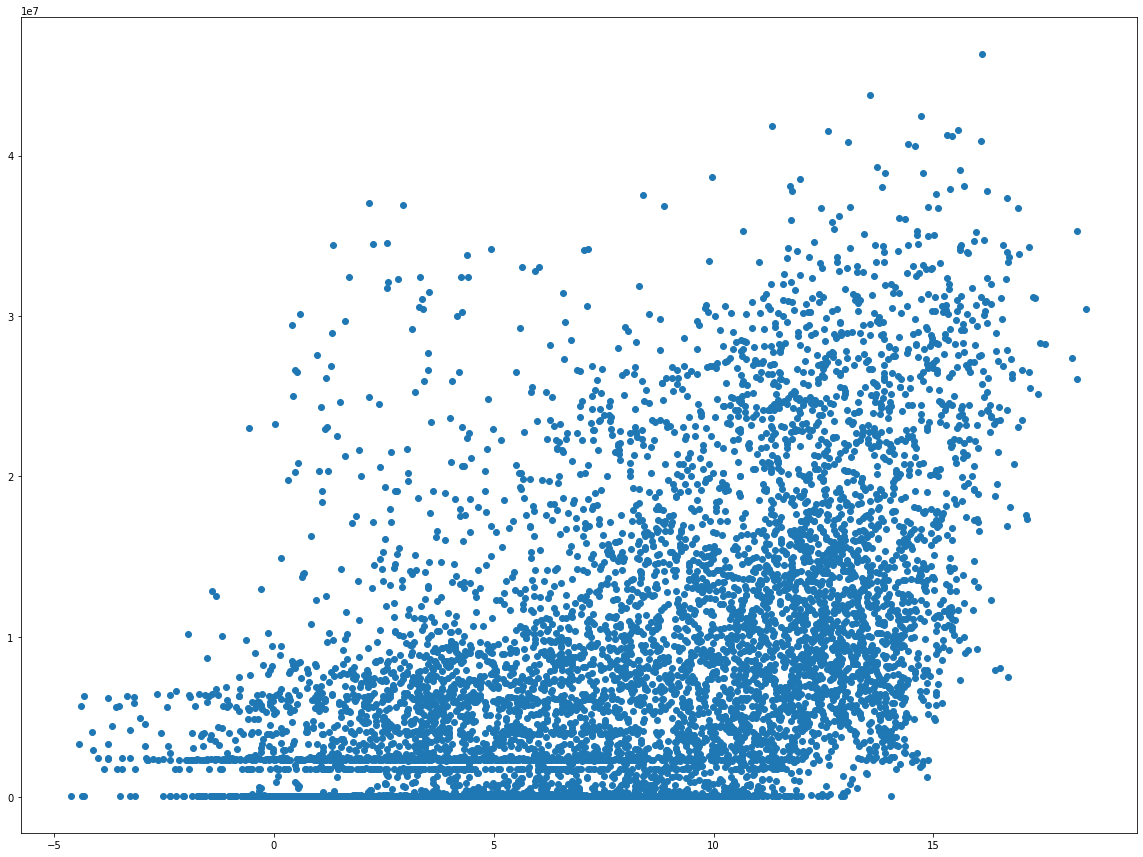

In [46]:
plt.scatter(df.deltaT,df.Power)

In [47]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))


In [48]:
results=model.fit()

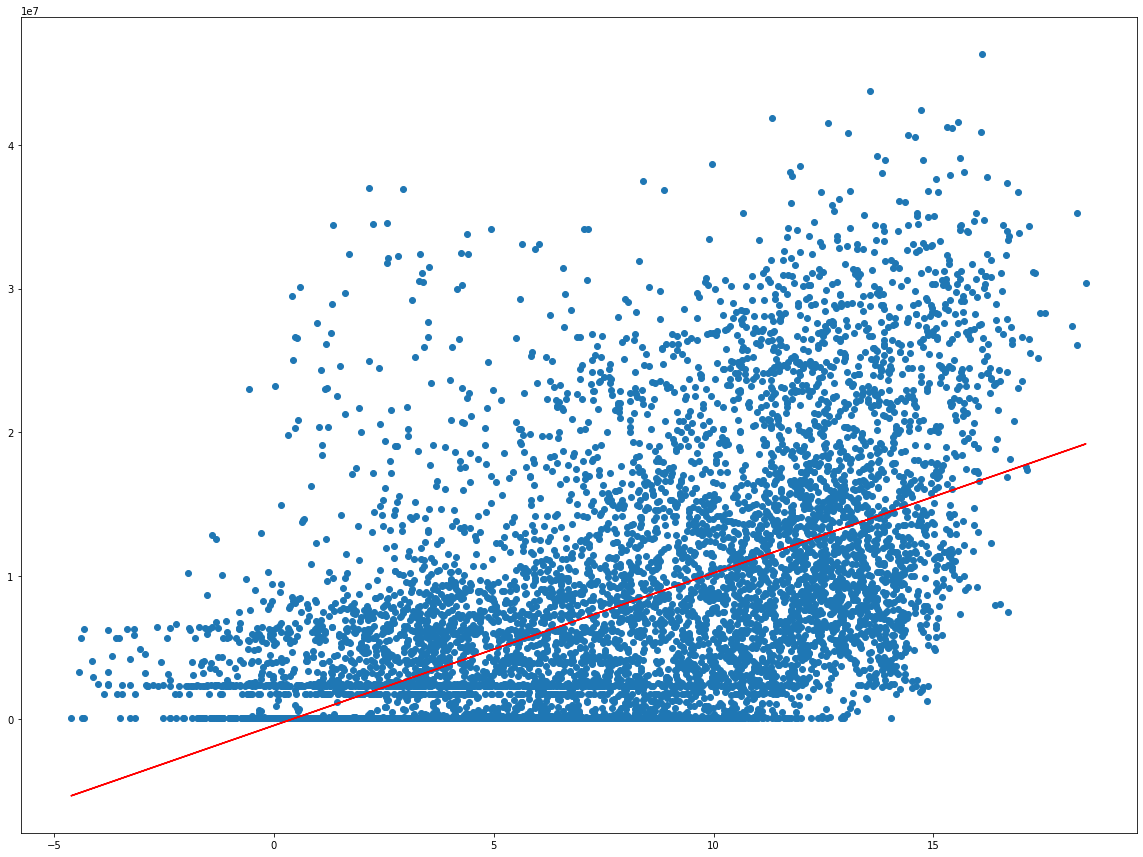

In [49]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     3734.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:16:27   Log-Likelihood:            -1.5073e+05
No. Observations:                8760   AIC:                         3.015e+05
Df Residuals:                    8758   BIC:                         3.015e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.331e+05   1.51e+05     -2.868      0.004   -7.29e+05   -1.37e+05
deltaT      1.062e+06   1.74e+04     61.107      0.000    1.03e+06     1.1e+06
==============================================================================
Omnibus:                     1574.247   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.783
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       4.495   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
tmp = df.index
tmp = pd.to_datetime(tmp)
df = df.set_index(tmp) 
df=df.resample('H').mean()
df=df.dropna()

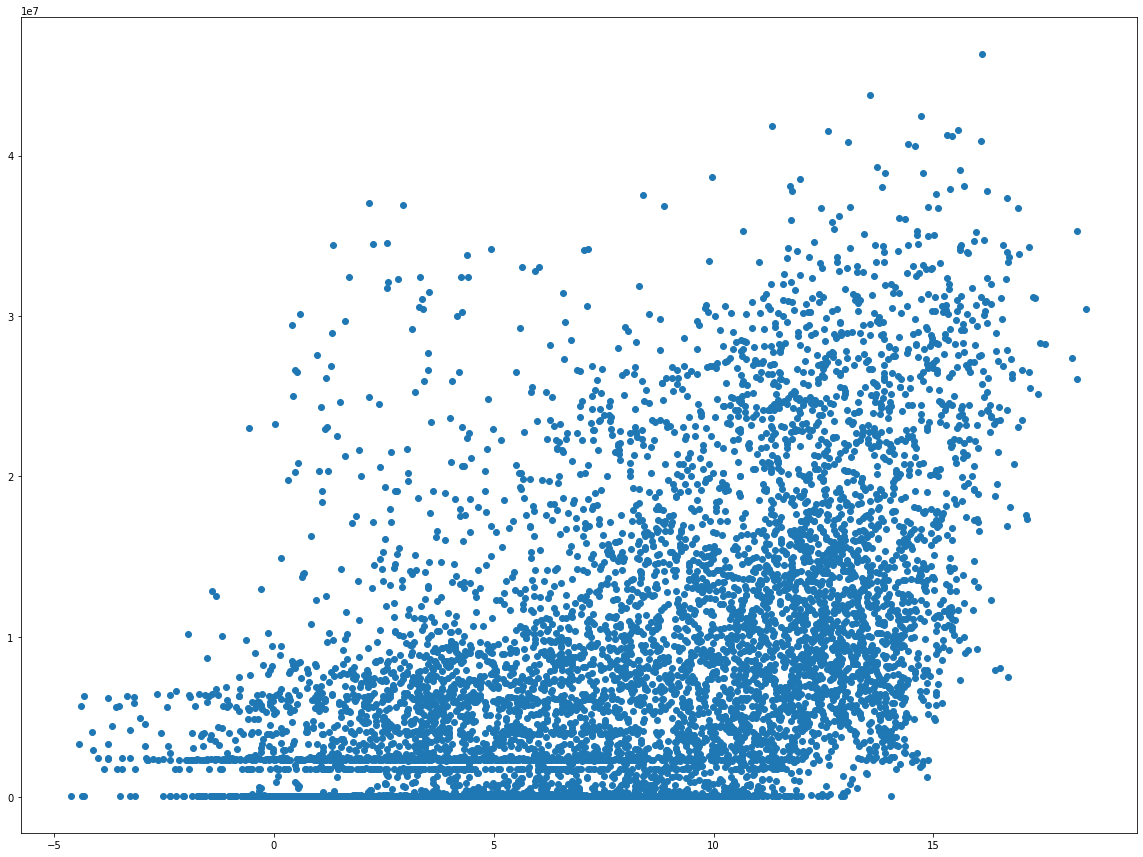

In [52]:
plt.scatter(df.deltaT,df.Power)

In [53]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [54]:
results=model.fit()

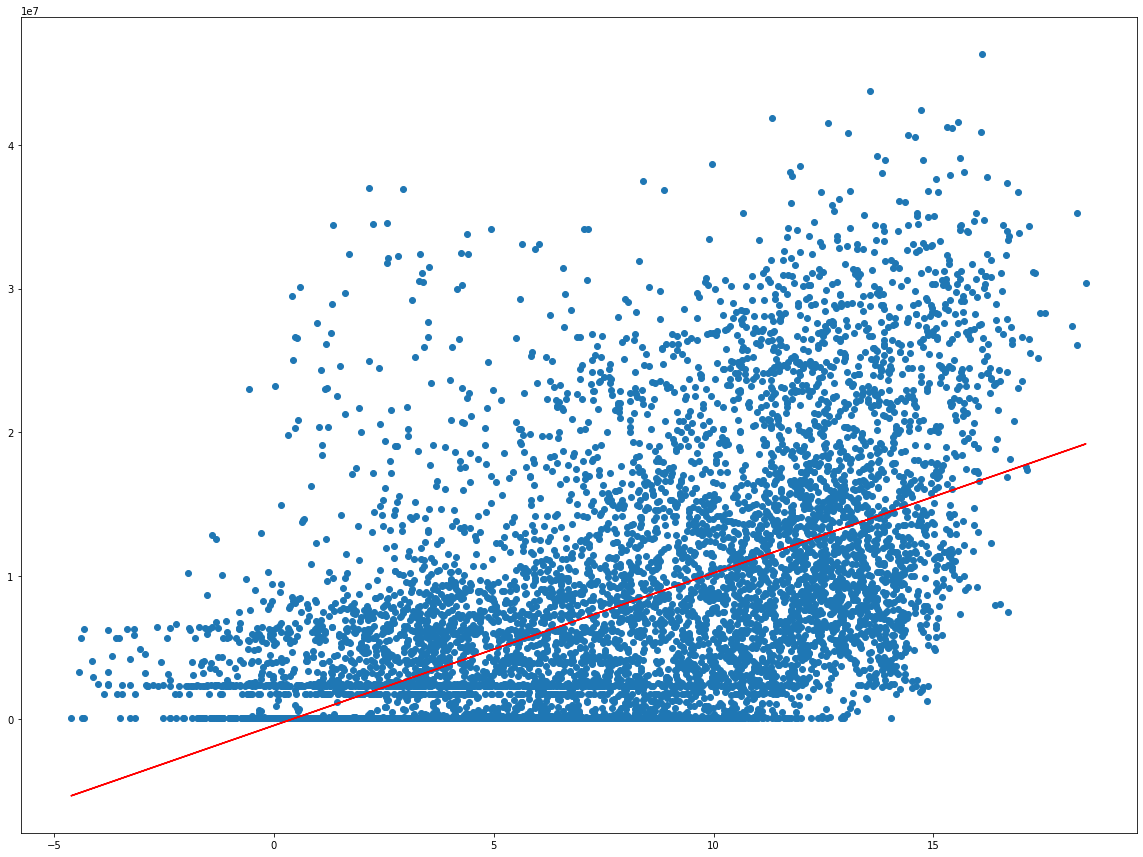

In [55]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     3734.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:17:06   Log-Likelihood:            -1.5073e+05
No. Observations:                8760   AIC:                         3.015e+05
Df Residuals:                    8758   BIC:                         3.015e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.331e+05   1.51e+05     -2.868      0.004   -7.29e+05   -1.37e+05
deltaT      1.062e+06   1.74e+04     61.107      0.000    1.03e+06     1.1e+06
==============================================================================
Omnibus:                     1574.247   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.783
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       4.495   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
df=df.resample('D').mean()
df=df.dropna()

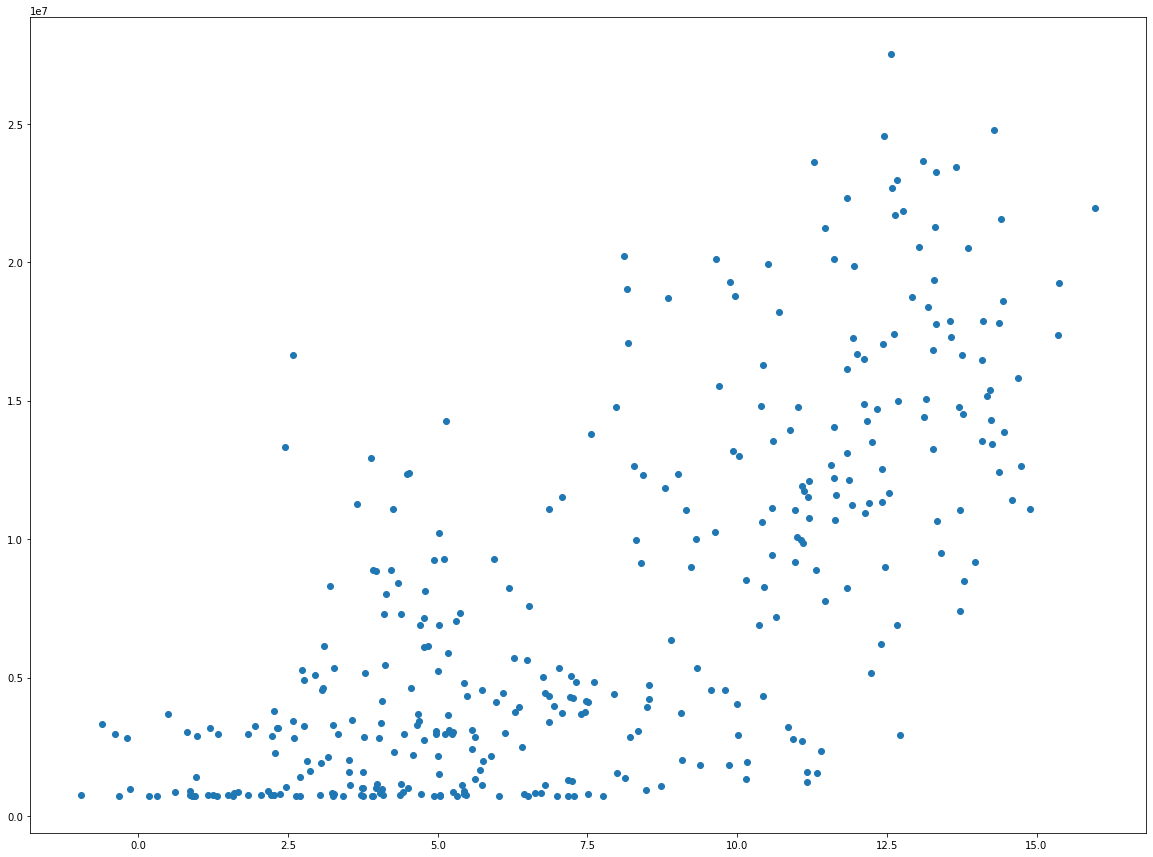

In [58]:
plt.scatter(df.deltaT,df.Power)

In [59]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [60]:
results=model.fit()

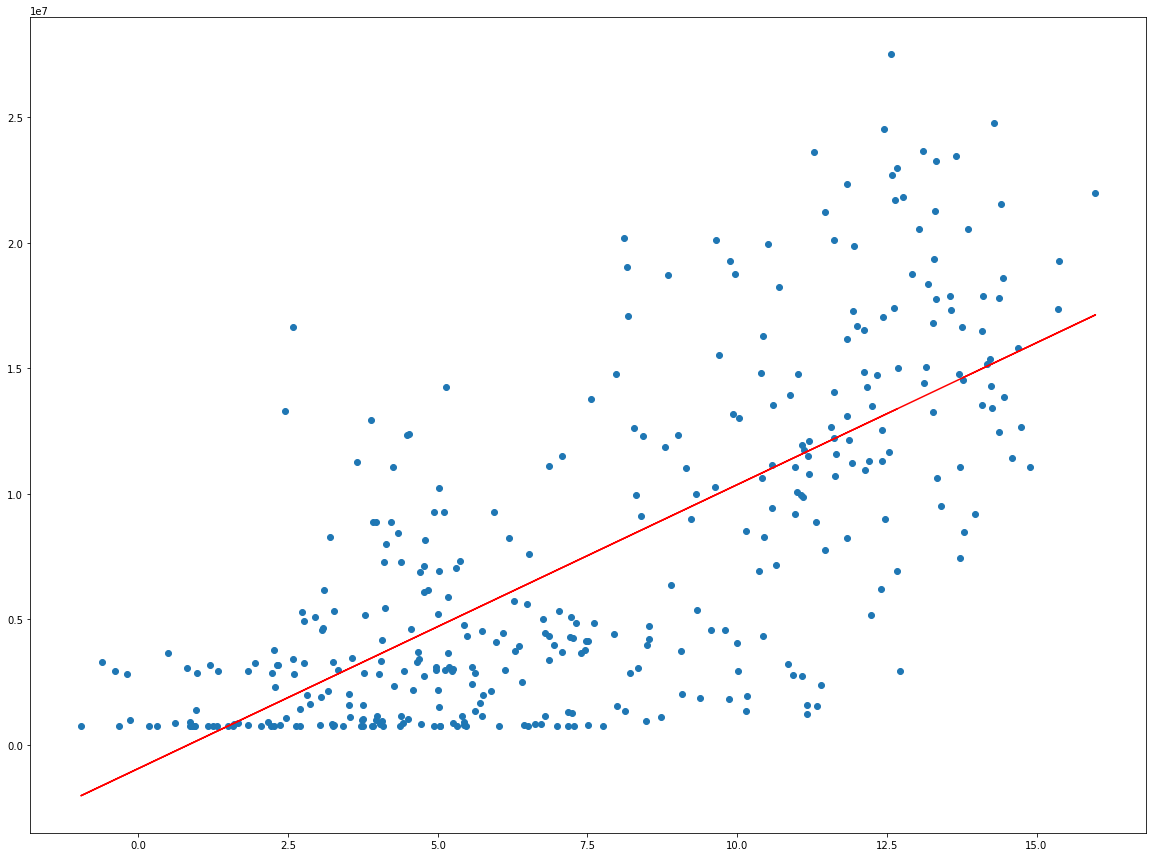

In [61]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [62]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     383.3
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           9.06e-59
Time:                        20:17:23   Log-Likelihood:                -6115.7
No. Observations:                 365   AIC:                         1.224e+04
Df Residuals:                     363   BIC:                         1.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.427e+05   4.94e+05     -1.908      0.057   -1.91e+06    2.91e+04
deltaT      1.131e+06   5.77e+04     19.577      0.000    1.02e+06    1.24e+06
==============================================================================
Omnibus:                       12.627   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.943
Skew:                           0.443   Prob(JB):                      0.00155
Kurtosis:                       3.260   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
df=df.resample('W').mean()
df=df.dropna()

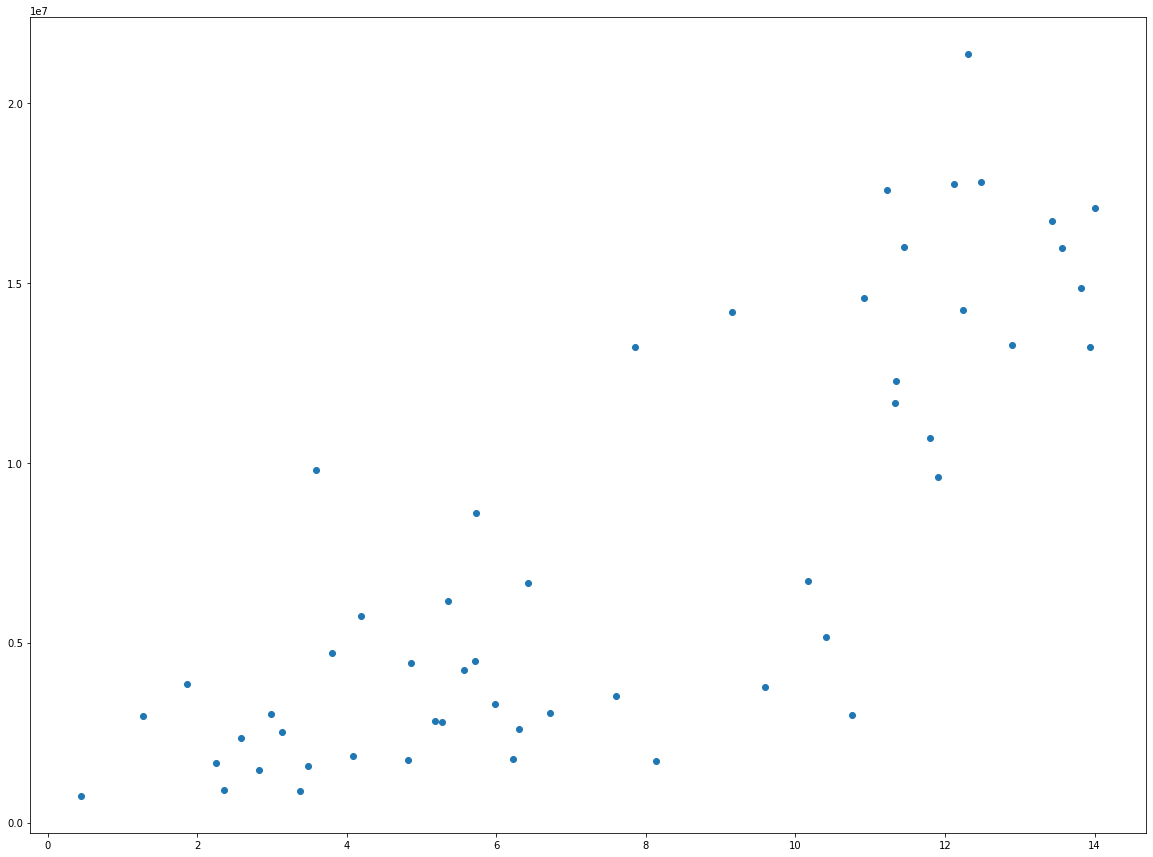

In [64]:
plt.scatter(df.deltaT,df.Power)


In [65]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [66]:
results=model.fit()

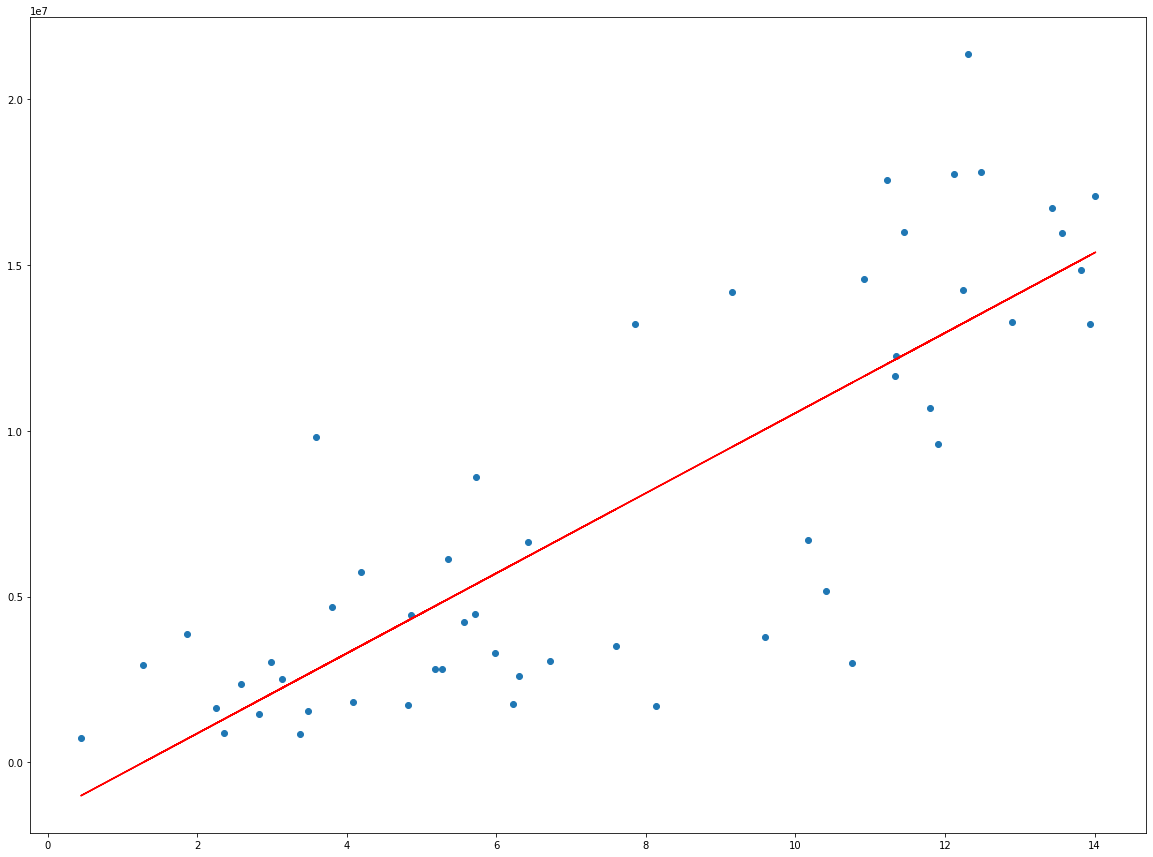

In [67]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1129.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           4.21e-27
Time:                        17:13:01   Log-Likelihood:                -56.267
No. Observations:                  35   AIC:                             116.5
Df Residuals:                      33   BIC:                             119.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1572      0.541     -9.539      0.000      -6.257      -4.057
deltaT         1.5136      0.045     33.602      0.000       1.422       1.605
==============================================================================
Omnibus:                       22.376   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.659
Skew:                          -1.660   Prob(JB):                     1.81e-08
Kurtosis:                       6.664   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""